In [1]:
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import matplotlib.pyplot as plt

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
base_path = '/content/drive/MyDrive/Dataset'

In [4]:
'''
import os
if os.path.exists(base_path):
  sub_items = os.listdir(base_path)

  if sub_items:
    for item in sub_items:
      print(item)
  else:
    print("No sub item")
else:
  print("No path")
'''

val
__MACOSX
train
test


In [4]:
train_dir = base_path + '/train'
test_dir = base_path + '/test'
validate_dir = base_path + '/val'

In [5]:
# Image Data Generators
train_datagen = ImageDataGenerator(rescale=1./255)
test_datagen = ImageDataGenerator(rescale=1./255)
validate_datagen = ImageDataGenerator(rescale=1./255)

In [6]:
batch_size = 32
img_height, img_width = 150, 150

In [7]:
# Generators for training, testing, and validation data
train_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size = (img_height, img_width),
    batch_size = batch_size,
    class_mode = 'binary'
)

Found 5229 images belonging to 2 classes.


In [8]:
test_generator = test_datagen.flow_from_directory(
    test_dir,
    target_size = (img_height, img_width),
    batch_size = batch_size,
    class_mode = 'binary'
)

Found 624 images belonging to 2 classes.


In [9]:
validate_generator = validate_datagen.flow_from_directory(
    validate_dir,
    target_size = (img_height, img_width),
    batch_size = batch_size,
    class_mode = 'binary'
)

Found 16 images belonging to 2 classes.


In [10]:
# Building the CNN model
model = tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(32, (3,3), activation='relu', input_shape=(img_height, img_width, 3)),
    tf.keras.layers.MaxPooling2D(2, 2),

    tf.keras.layers.Conv2D(64, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2, 2),

    tf.keras.layers.Conv2D(128, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2, 2),

    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(512, activation='relu'),
    tf.keras.layers.Dense(1, activation='sigmoid')
])

In [11]:
model.compile(optimizer='adam', loss='binary_crossentropy', metrics='accuracy')

In [13]:
history = model.fit(
    train_generator,
    epochs=10,
    validation_data=validate_generator
)

Epoch 1/10
164/164 [==============================] - 65s 399ms/step - loss: 0.0931 - accuracy: 0.9679 - val_loss: 0.3617 - val_accuracy: 0.8750
Epoch 2/10
164/164 [==============================] - 62s 378ms/step - loss: 0.0768 - accuracy: 0.9723 - val_loss: 0.4167 - val_accuracy: 0.8125
Epoch 3/10
164/164 [==============================] - 65s 395ms/step - loss: 0.0591 - accuracy: 0.9788 - val_loss: 0.2572 - val_accuracy: 0.8750
Epoch 4/10
164/164 [==============================] - 63s 381ms/step - loss: 0.0538 - accuracy: 0.9793 - val_loss: 0.2582 - val_accuracy: 0.8125
Epoch 5/10
164/164 [==============================] - 63s 385ms/step - loss: 0.0431 - accuracy: 0.9847 - val_loss: 0.2278 - val_accuracy: 0.9375
Epoch 6/10
164/164 [==============================] - 64s 392ms/step - loss: 0.0285 - accuracy: 0.9908 - val_loss: 0.2971 - val_accuracy: 0.8750
Epoch 7/10
164/164 [==============================] - 64s 390ms/step - loss: 0.0213 - accuracy: 0.9927 - val_loss: 0.2787 - val_ac

In [14]:
test_loss, test_acc = model.evaluate(test_generator)

20/20 [==============================] - 104s 5s/step - loss: 1.9926 - accuracy: 0.7788


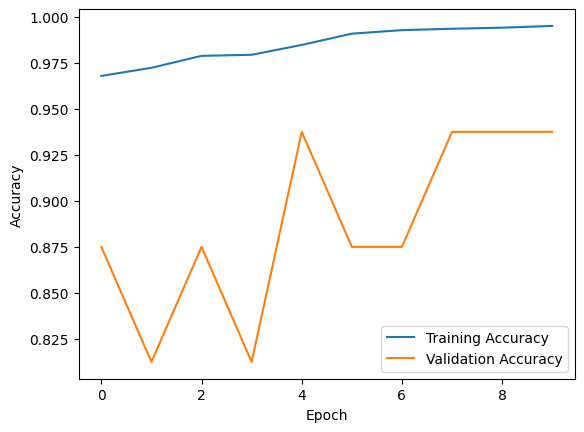

In [15]:
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

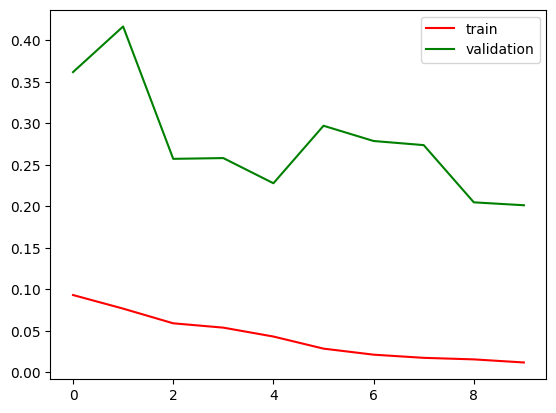

In [16]:
plt.plot(history.history['loss'],color='red',label='train')
plt.plot(history.history['val_loss'],color='green',label='validation')
plt.legend()
plt.show()